### Библиотеки

In [1]:
import pickle
from Experiment_Burgers_2_polynomial_linreg import *

In [2]:
import sys
sys.path.append(fr'/home/mex0/Documents/TukhbatullinAL/diplom_2/Git_stencil-net/Git_stencil-net/')

from utils import burgers_simulation,burgers_cd

In [3]:
BC_TYPE='dirichlet'; BC_VALUES=[0,0]

In [4]:
# lr=0.1

### Описание эксперимента:

- Поиск конечно - разностной аналогии

### 0. Параметры для генерации данных

In [5]:
# folder='Experiment_burgers_2_polynomial_linreg'

folder='Experiment_burgers_2_polynomial_linreg_6'

In [6]:
device

device(type='cuda')

In [7]:
# epochs_lst=[10,100,1_000,5_000]
epochs_lst=[30_000]

# new_epoch=[None]
new_epoch_lst=[40_000]

In [8]:
# для сил
np.random.seed(0)

L = 2.0*np.pi; T_ = 40;  Al = -0.1; Ar = 0.1; wl = -0.4; wr = 0.4; N = 20
A = np.zeros((N,)); w = np.zeros((N,)); phi = np.zeros((N,)); l = np.zeros((N,))

for k in range(0, N):
    A[k] = 0 #(Ar-Al)*np.random.rand(1) + Al
    w[k] = 0 #(wr-wl)*np.random.rand(1) + wl
    phi[k] = 0 #(2.0*np.pi)*np.random.rand(1)
    l[k] = 0 #np.random.randint(2, 5)

### 1. Генерация данных

In [9]:
n = 256; Tsim = 80001;
# Lx = 101; Tsim = 10001;
# n = 64; Tsim = 2001;
x_lst = np.linspace(0,L,n); h = x_lst[1] - x_lst[0]; D = 0.02; tau = 0.002

CFL = (h*h)/(2.0*D)
print("CFL dt", CFL, "actual dt", tau)

CFL dt 0.015178169013593782 actual dt 0.002


In [ ]:
# ##generate (by WENO + RK3)
# v_fact, phase = burgers_simulation(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

# ##save
# pickle.dump(v_fact, open(fr'{folder}/data/v_fact_n={n}_Tsim={Tsim}.pkl', 'wb'))
# pickle.dump(phase, open(fr'{folder}/data/phase_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
# v_fact=pickle.load( open(fr'{folder}/data/v_fact_n={n}_Tsim={Tsim}.pkl', 'rb'))
# phase=pickle.load( open(fr'{folder}/data/phase_n={n}_Tsim={Tsim}.pkl', 'rb'))

In [ ]:
# ##generate (by UPWIND)
# v_fact = burgers_upwind(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

#save
# pickle.dump(v_fact, open(fr'{folder}/data/v_fact_UPWIND_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
# v_fact=pickle.load( open(fr'{folder}/data/v_fact_UPWIND_n={n}_Tsim={Tsim}.pkl', 'rb'))

In [10]:
# ##generate (by UPWIND)
# v_fact = burgers_cd(Tsim, n, x_lst, D, tau, A, w, phi, l, N, L,bc_type=BC_TYPE,bc_values=BC_VALUES)

#save
# pickle.dump(v_fact, open(fr'{folder}/data/v_fact_CD_ZeroForce_n={n}_Tsim={Tsim}.pkl', 'wb'))

##load
v_fact=pickle.load( open(fr'{folder}/data/v_fact_CD_ZeroForce_n={n}_Tsim={Tsim}.pkl', 'rb'))

Text(0.5, 1.0, 'Фактические данные')

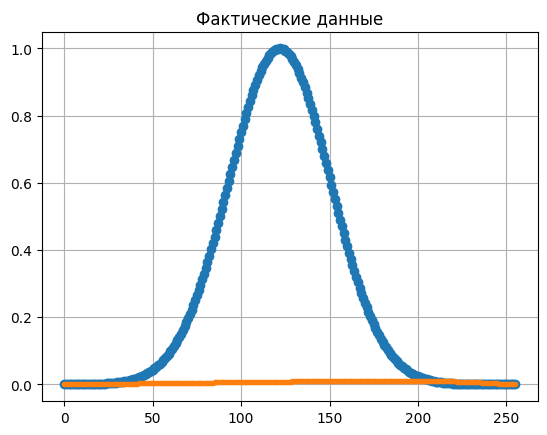

In [11]:
#view
plt.plot(v_fact[:,0],'o-')
plt.plot(v_fact[:,-1],'.-')
plt.grid()
plt.title('Фактические данные')

In [12]:
print('h',h,h**2)
print('tau',tau)
assert tau/h<=1,'не выполнено ограничение на число Куранта'

h 0.024639942381096416 0.0006071267605437513
tau 0.002


### 2. Сабсемплинг

In [13]:
t_factor = 1  # time subsample factor 
s_factor = 1  # space subsample factor

# t_factor = 20
# s_factor = 4

# t_factor = 20
# s_factor = 5

# t_factor = 5
# s_factor = 5

Tsim=len(v_fact[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=subsampling(s_factor,t_factor,h,tau,Tsim,n,v_fact,train_split=train_split)

full_sample (256, 80001)
train (256, 20000)
test (256, 60001)


In [14]:
tau/h

np.float64(0.08116902097686662)

In [15]:
(t_factor*tau)/(s_factor*h)

np.float64(0.08116902097686662)

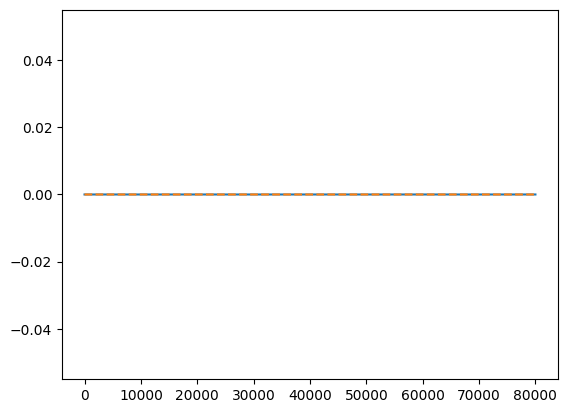

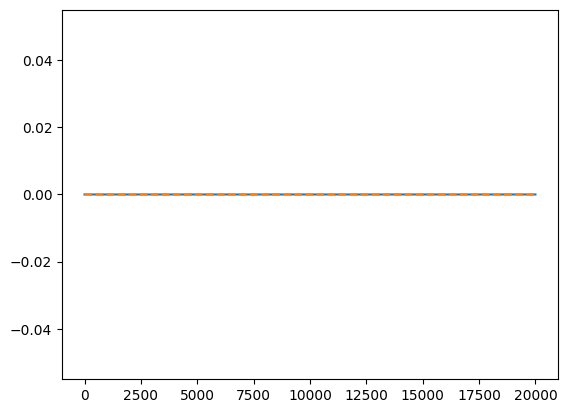

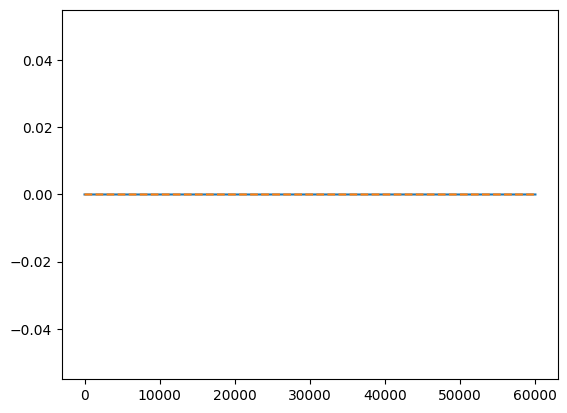

In [16]:
##check right point
plt.figure()
plt.plot(v_fact[0,:])
plt.plot(v_fact[-1,:],'--')

plt.figure()
plt.plot(v_coarse_train[0,:])
plt.plot(v_coarse_train[-1,:],'--')

plt.figure()
plt.plot(v_coarse_test[0,:])
plt.plot(v_coarse_test[-1,:],'--')

In [17]:
dxc==dtc, dxc

(np.False_, np.float64(0.024639942381096416))

Text(0.5, 1.0, 'Фактические данные после сабсемплинга')

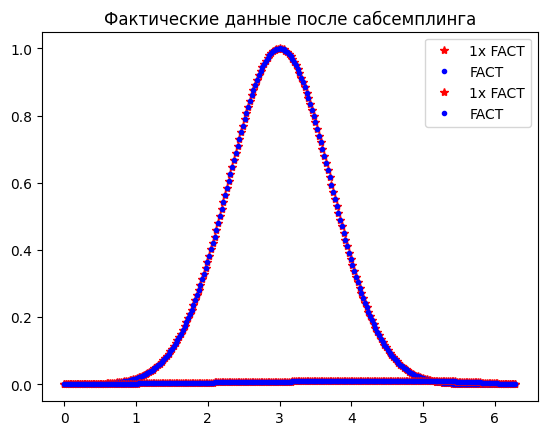

In [18]:
plt.figure()
time=0 #first time
plt.plot(x_lst[coarse_x],v_coarse[:,time],'*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'.',color='blue',label='FACT')
time=v_coarse.shape[1]-1 #last time
plt.plot(x_lst[coarse_x],v_coarse[:,time],'*',color='red',label=str(s_factor) + 'x FACT')
plt.plot(x_lst,v_fact[:,t_factor*time],'.',color='blue',label='FACT')
plt.legend()
# plt.title(" Time slice at t=0 and t = " + str(time))
# plt.show()
plt.title('Фактические данные после сабсемплинга')

In [19]:
v_coarse_train.shape

(256, 20000)

In [20]:
lr

1.0

In [ ]:
assert 1==2, 'stop point'

### 3. Тренировка модели

In [21]:
from utils import forcing_terms

Fc, Fc_0p5, Fc_p1, Fc_0m5, Fc_m1 = forcing_terms(A, w, phi, l, L, Lxc, T_, Ltc, N, dtc)

# u_train = torch.tensor(v_coarse_train.T, requires_grad=True, dtype=torch.float, device=device)
fc      = torch.tensor(Fc.T, requires_grad=True, dtype=torch.float, device=device)
fc_0p5  = torch.tensor(Fc_0p5.T, requires_grad=True, dtype=torch.float, device=device)
fc_p1   = torch.tensor(Fc_p1.T, requires_grad=True, dtype=torch.float, device=device)
fc_0m5  = torch.tensor(Fc_0m5.T, requires_grad=True, dtype=torch.float, device=device)
fc_m1   = torch.tensor(Fc_m1.T, requires_grad=True, dtype=torch.float, device=device)

In [22]:
lr

1.0

In [23]:
new_epoch_lst

[40000]

In [24]:

for i in range(len(epochs_lst)):
    epoch=epochs_lst[i]
    if new_epoch_lst==None:
        print('starting study')
        net, loss_lst,loss=train_net(MLPConv,v_coarse_train,epoch,dtc,
                    fs,
                    neurons,
                    hidden_layers_num,
                    lr,
                    m,
                    has_backward,
                    method,
                    decay_const,
                    force_terms=[fc,fc_0p5,fc_p1,fc_0m5,fc_m1],
                    bc_type=BC_TYPE,bc_values=BC_VALUES,
                    verbose=True,
                    verbose_step=1000,
                    continue_fitting=None)
        pickle.dump(net, open(fr'{folder}/models/net_epochs={epoch}_device={device}', 'wb'))
    else:
        print('continue study')
        new_epoch=new_epoch_lst[i]
        net = pickle.load(open(fr'{folder}/models/net_epochs={epoch}_device={device}', 'rb'))
        net, loss_lst,loss=train_net(MLPConv,v_coarse_train,new_epoch-epoch,dtc,
                    fs,
                    neurons,
                    hidden_layers_num,
                    lr,
                    m,
                    has_backward,
                    method,
                    decay_const,
                    force_terms=[fc,fc_0p5,fc_p1,fc_0m5,fc_m1],
                    bc_type=BC_TYPE,bc_values=BC_VALUES,
                    verbose=True,
                    verbose_step=1000,
                    continue_fitting=[net,new_epoch])
        
        pickle.dump(net, open(fr'{folder}/models/cf_net_epochs={new_epoch}_device={device}', 'wb'))

continue study
#parameters: 6


  0%|                                 | 6/10000 [00:00<11:44, 14.19it/s, loss=0]

Веса после 40000 эпохи:
tensor([[ 32.0945],
        [-66.3745],
        [ 32.1544],
        [ -0.8452],
        [ 19.8389],
        [-20.7780]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 10%|███                           | 1007/10000 [00:23<03:33, 42.13it/s, loss=0]

Веса после 41000 эпохи:
tensor([[ 32.8115],
        [-65.6794],
        [ 32.8674],
        [ -0.2316],
        [ 20.4233],
        [-20.1909]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 20%|██████                        | 2010/10000 [00:46<03:01, 43.94it/s, loss=0]

Веса после 42000 эпохи:
tensor([[ 32.8269],
        [-65.7032],
        [ 32.8759],
        [ -0.2035],
        [ 20.4072],
        [-20.2031]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 30%|█████████                     | 3007/10000 [01:09<02:40, 43.49it/s, loss=0]

Веса после 43000 эпохи:
tensor([[ 32.8450],
        [-65.7318],
        [ 32.8865],
        [ -0.1725],
        [ 20.3897],
        [-20.2167]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 40%|████████████                  | 4005/10000 [01:32<02:15, 44.29it/s, loss=0]

Веса после 44000 эпохи:
tensor([[ 32.8637],
        [-65.7579],
        [ 32.8979],
        [ -0.1417],
        [ 20.3738],
        [-20.2290]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 50%|███████████████               | 5004/10000 [01:54<01:57, 42.38it/s, loss=0]

Веса после 45000 эпохи:
tensor([[ 32.8749],
        [-65.7831],
        [ 32.9030],
        [ -0.1185],
        [ 20.3576],
        [-20.2420]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 60%|██████████████████            | 6006/10000 [02:17<01:27, 45.60it/s, loss=0]

Веса после 46000 эпохи:
tensor([[ 32.8874],
        [-65.8003],
        [ 32.9106],
        [ -0.0971],
        [ 20.3465],
        [-20.2504]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 70%|█████████████████████         | 7007/10000 [02:40<01:08, 43.91it/s, loss=0]

Веса после 47000 эпохи:
tensor([[ 32.8521],
        [-65.8603],
        [ 32.8712],
        [ -0.1092],
        [ 20.3076],
        [-20.2871]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 80%|████████████████████████      | 8007/10000 [03:02<00:42, 46.92it/s, loss=0]

Веса после 48000 эпохи:
tensor([[ 32.9015],
        [-65.8309],
        [ 32.9172],
        [ -0.0682],
        [ 20.3266],
        [-20.2663]], device='cuda:0', grad_fn=<AsStridedBackward0>)


 90%|███████████████████████████   | 9006/10000 [03:25<00:23, 41.67it/s, loss=0]

Веса после 49000 эпохи:
tensor([[ 3.2912e+01],
        [-6.5837e+01],
        [ 3.2925e+01],
        [-5.3908e-02],
        [ 2.0323e+01],
        [-2.0269e+01]], device='cuda:0', grad_fn=<AsStridedBackward0>)


100%|█████████████████████████████| 10000/10000 [03:47<00:00, 43.93it/s, loss=0]


In [25]:
epochs_lst=new_epoch_lst

In [ ]:
net.layer[-1].weight

### 4. Симуляция прогноза моделью

In [ ]:
# my_pred=torch.tensor(v_coarse[:,0])+tau*net(torch.tensor(v_coarse[:,0],dtype=torch.float,device=device))

# plt.plot(v_coarse[:,0],'-*')
# plt.plot(v_coarse[:,1],'--')

# plt.plot(my_pred.detach().numpy(),color='cyan')

In [26]:
NN_sim_lst=[]

weights=[]
biases=[]

for epochs in epochs_lst:
    
    net = pickle.load(open(fr'{folder}/models/net_epochs={epochs}_device={device}', 'rb'))
    # NN_sim,T_sim,x_sim=make_simulation(net,v_coarse,L,Lxc,dtc,method=method,
                                              # bc_type=BC_TYPE,bc_values=BC_VALUES)
    NN_sim,T_sim,x_sim=make_simulation_forcing(net,v_coarse[:,:],L,Lxc,dtc,\
                                              A,phi,N,w,l,method=method,
                                              bc_type=BC_TYPE,bc_values=BC_VALUES)
    
    NN_sim_lst.append(NN_sim)
    
    try:
        weights.append(net.layer[0].weight.data.numpy())
    except:
        weights.append(net.layer[0].weight.cpu().data.numpy())
        
    biases.append(None)

E1


100%|████████████████████████████████████| 80000/80000 [01:32<00:00, 860.96it/s]


In [ ]:
v_coarse.shape

In [27]:
if len(weights[0][0])==9:
    coef_name=['u_l','u','u_r','u_l*u','u^2','u_r*u','u_l^2','u_r^2','u_r*r_l']
    true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
                D/h/h/s_factor/s_factor,0.0,0.0,0.0,1/2/h/s_factor,-1/2/h/s_factor,0.0]
    true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})
    for i in range(len(epochs_lst)):
        true_coeffs_df[fr'epoch={epochs_lst[i]}']=weights[i][0]
    display(true_coeffs_df)

elif len(weights[0][0])==6:

    coef_name=['u_l','u','u_r','u^2','u_l^2','u_r^2']
    true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
                D/h/h/s_factor/s_factor,0,1/2/h/s_factor,-1/2/h/s_factor]
    true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})
    for i in range(len(epochs_lst)):
        true_coeffs_df[fr'epoch={epochs_lst[i]}']=weights[i][0]
    display(true_coeffs_df)

,coef_name,true_coef_value,epoch=40000
0,u_l,3.294e+01,3.291e+01
1,u,-6.588e+01,-6.585e+01
2,u_r,3.294e+01,3.293e+01
3,u^2,0.000e+00,-4.605e-02
4,u_l^2,2.029e+01,2.032e+01
5,u_r^2,-2.029e+01,-2.027e+01


In [28]:
# s_factor=5
# t_factor=25
# coef_name=['u_l','u','u_r','u_l*u','u^2','u_r*u','u_l^2','u_r^2','u_r*r_l']
# true_coeffs=[D/h/h/s_factor/s_factor,-2*D/h/h/s_factor/s_factor,
#              D/h/h/s_factor/s_factor,0.0,0.0,0.0,1/2/h/s_factor,-1/2/h/s_factor,0.0]
# true_coeffs_df=pd.DataFrame({'coef_name':coef_name,'true_coef_value':true_coeffs})

In [29]:
tau/h/h

np.float64(3.294204983171507)

In [30]:
t_factor*tau/h/h/(s_factor*s_factor)

np.float64(3.294204983171507)

In [31]:
for i in true_coeffs:
    print(i)

32.94204983171507
-65.88409966343013
32.94204983171507
0
20.292255244216655
-20.292255244216655


In [32]:
# pd.DataFrame({'epoch':epochs_lst+[['finite_diff_methods']],
#               'coefs':weights+[true_coeffs],
#               'bias':biases+[[None]]})

In [33]:
print(dxc)

0.024639942381096416


### 5. Результаты

In [34]:
T=round(T_sim*dtc,3)
T

160.002

In [35]:
# err=np.abs(v_coarse[:,:]-NN_sim)
# mae_list=[err[:,i].mean() for i in range(err.shape[1])]
# mae_df=pd.DataFrame({'method':method,'mae_list':mae_list}).to_csv(fr'{method}_mae.csv')

In [36]:
net.layer[0].weight

Parameter containing:
tensor([[ 3.2915e+01, -6.5848e+01,  3.2925e+01, -4.6049e-02,  2.0316e+01,
         -2.0275e+01]], device='cuda:0', requires_grad=True)

---------------Epochs = 40000-------------------


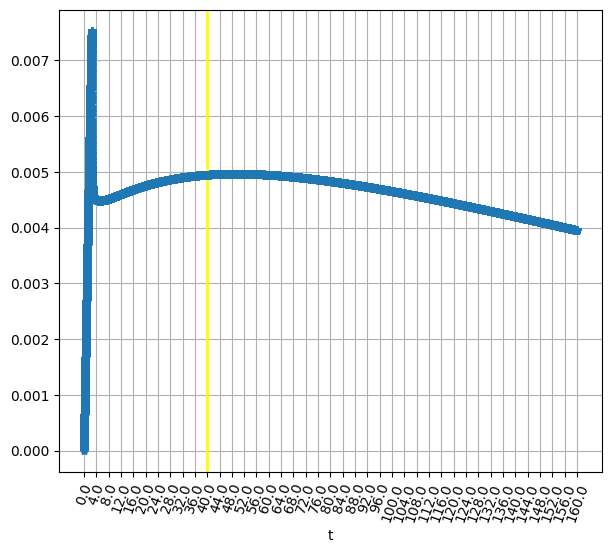

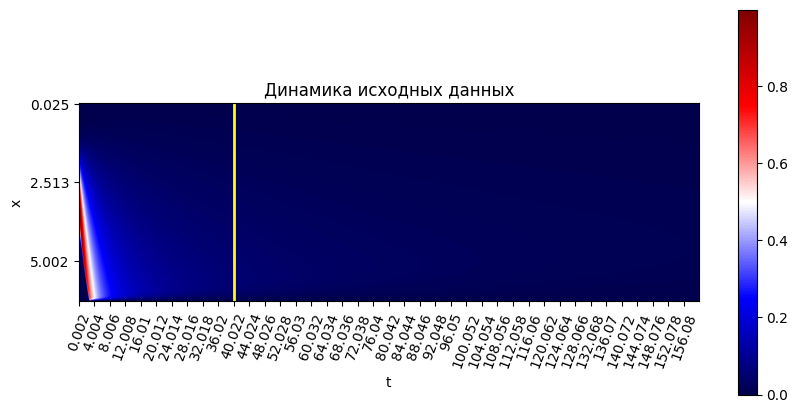

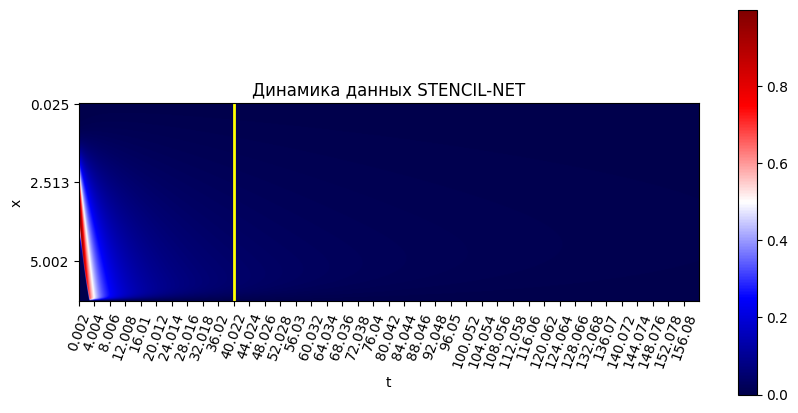

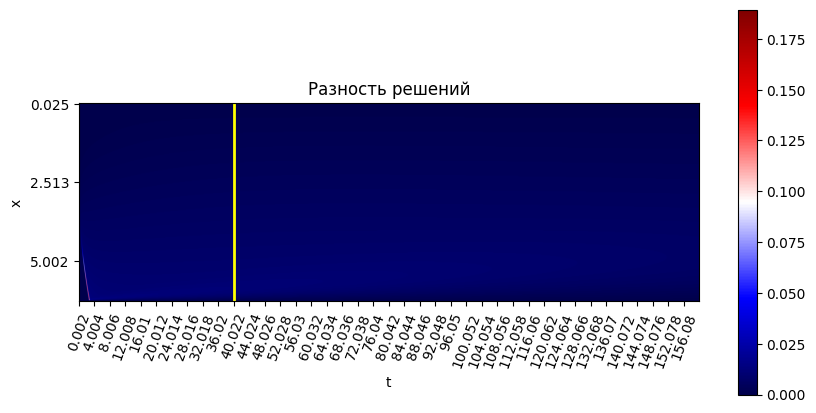

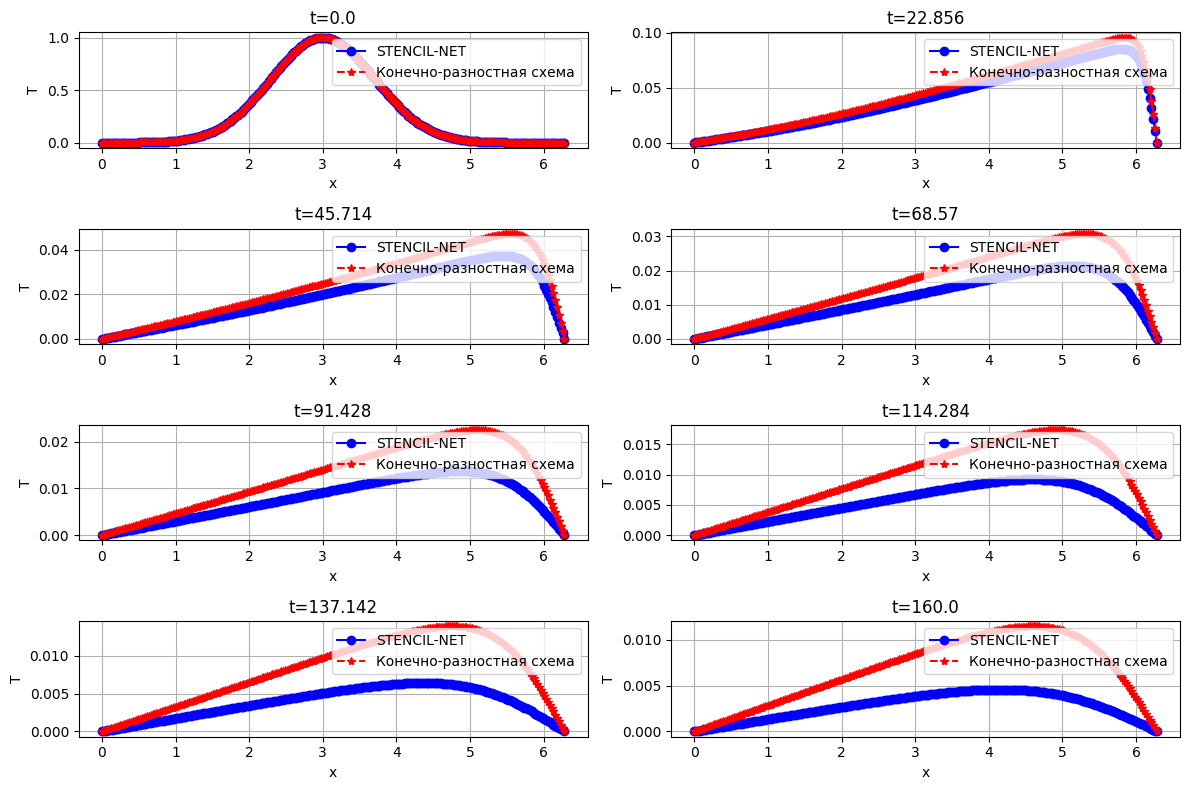



done


In [37]:

for i in range(len(epochs_lst)):
    
    print(fr'---------------Epochs = {epochs_lst[i]}-------------------')
    view_results(T_sim,x_sim,NN_sim_lst[i],v_coarse[:,:],T,dtc,n=11,fix_axes=True,
                epochs=epochs_lst[i],
                save_path = fr'{folder}/graphs/',
                save_name = fr'Result_epoch={epochs_lst[i]}',
                view_flag=False)
    view_result_metric(NN_sim_lst[i],v_coarse[:,:],T,dtc,L,dxc,
                       n_xticks=2000,
                       save_path = fr'{folder}/graphs/',
                save_name = fr'Metric_epoch={epochs_lst[i]}')

    view_result_imshow(NN_sim_lst[i],v_coarse[:,:],T,dtc,L,dxc,
                       figsize=(10,5),aspect=100,n_xticks=2001,n_yticks=101,
                       save_path = fr'{folder}/graphs/',
                       save_name = fr'Imshow_epoch={epochs_lst[i]}',
                       fix_colorbar_axes=False,
                       colorbar_min_max=[-0.1,1.1],cmap='seismic'
                       )
    
    make_gif(folder=fr'{folder}/graphs/',epochs=epochs_lst[i])

    # make_gif(folder=fr'{folder}/graphs/',epochs=epochs_lst[i],format='mp4')

    make_subplot_graphs(NN_sim_lst[i], v_coarse, x_sim, T_sim, T, dtc,8,nx=4,ny=2,
                        save_flg=True,
                        save_path = fr'{folder}/graphs/',
                        save_name=fr'SUBPLOT_{epochs_lst[i]}')

    print('\n')
print('done')

In [38]:
has_backward

False

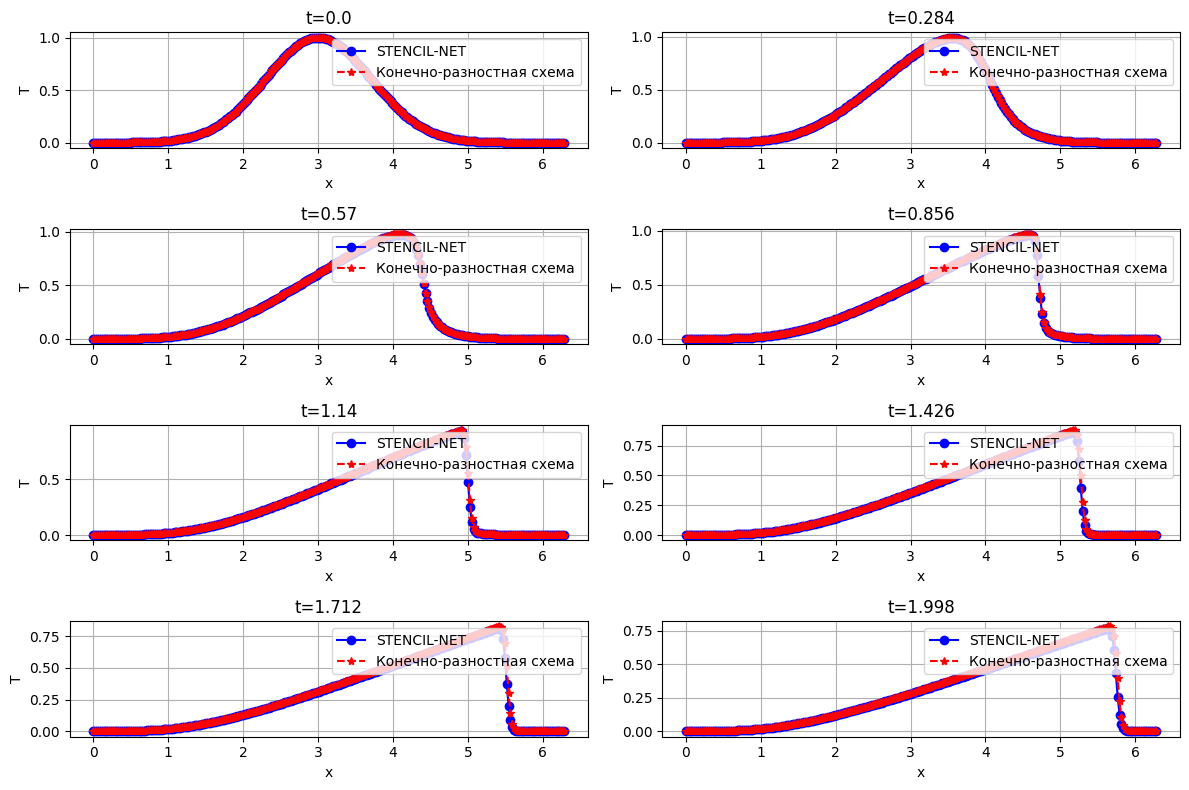

In [39]:
make_subplot_graphs(NN_sim_lst[0], v_coarse, x_sim, 1000, T, dtc,8,nx=4,ny=2,
                        save_flg=False,
                        save_path = fr'{folder}/graphs/')

In [ ]:
view_results(T_sim,x_sim,NN_sim_lst[i],v_coarse,T,dtc,n=11,fix_axes=True,
                epochs=epochs_lst[i],
                save_path = fr'{folder}/graphs/',
                save_name = fr'Result_epoch={epochs_lst[i]}',
                view_flag=False)

In [ ]:
for j in range(T_sim):
    temp=NN_sim_lst[0][:,j]-v_coarse[:,j]

    if max(temp)>0.3:
        print(j)

In [ ]:
plt.plot(NN_sim_lst[0][:,104],label='net')
plt.plot(v_coarse[:,104],label='fact')
plt.legend()
plt.title(104)
plt.grid()

In [ ]:
v_coarse.shape

### RK3_mae vs E1_mae

In [ ]:
# rk3_mae=pd.read_csv(fr'RK3_mae.csv')
# e1_mae=pd.read_csv(fr'E1_mae.csv')
# plt.plot(rk3_mae['mae_list'],label='RK3')
# plt.plot(e1_mae['mae_list'],label='E1')
# plt.grid()
# plt.legend()